https://github.com/mahakal001/reinforcement-learning/blob/master/rl-an-introduction/chapter02/10-armed-bandit-part-1.ipynb

https://blog.gofynd.com/multi-armed-bandit-solution-methods-e85e6b19fb2d

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
np.random.seed(777)

In [4]:
action_indices = np.arange(0,10)

In [5]:
# Sample true rewards from  normal ( not uniform ) distibution
mu = 0
sigma = 1
shape = (10)
true_rewards = np.random.normal(mu, sigma, shape)

In [6]:
true_rewards

array([-0.46820879, -0.82282485, -0.0653801 , -0.71336192,  0.90635089,
        0.76623673,  0.82605407, -1.32368279, -1.75244452,  1.00244907])

In [7]:
# At runtime we will select rewards with true rewards as mean and unit variance normal distribution
# Lets Plot how it will look like
%time
runtime_rewards = np.array([ np.random.normal(true_reward,1,1000) for true_reward in true_rewards])
#runtime_rewards[1]

Wall time: 0 ns


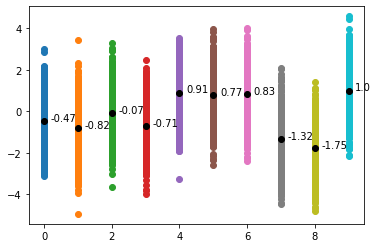

In [8]:
for index in action_indices :
    plt.scatter(np.full((1000),index),runtime_rewards[index])
    plt.text(index+0.2,true_rewards[index],str(round(true_rewards[index],2)))
plt.plot(action_indices, true_rewards,'o', color='black')
plt.show()

In [9]:
# Produce a testbed of 2000 bandit problems
np.random.seed(10)
n_bandit = 2000
n_lever = 10
steps = 1000

testbed = np.random.normal(0,1,(n_bandit,n_lever))
reward_estimates = np.zeros((n_bandit,n_lever))
action_count = np.ones((n_bandit,n_lever))  # each lever is pulled atleast once
initial_reward_estimates =  np.random.normal(testbed,1)
#initial_reward_estimates

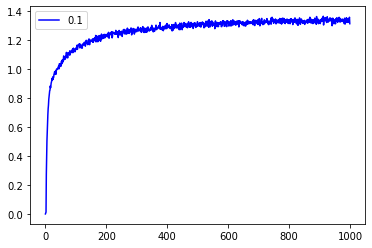

In [10]:
running_reward_sum = np.copy(reward_estimates) # _per_action_per_bandit

rewards = []
rewards.append(0) 
rewards.append(np.mean(initial_reward_estimates)) # step 1

epsilon = 0.1
for step in range(2,steps):
    reward_sum_over_all_bandits_per_step = 0
    for problem_index in range(n_bandit):  
        if np.random.random() > epsilon: # Greedy Selection
            maxval = np.amax(reward_estimates[problem_index])
            maxval_indices = np.ravel(np.array(np.where(reward_estimates[problem_index] == maxval)))
            random_choice = np.random.choice( maxval_indices ) # breaking ties randomly
        else :
             random_choice = np.random.randint(n_lever)
        
        #print(str(problem_index),str(step),str(random_choice))
        running_reward_sum[problem_index][random_choice] += np.random.normal(testbed[problem_index][random_choice],1)
        action_count[problem_index][random_choice] += 1         
        avg_reward = running_reward_sum[problem_index][random_choice] / action_count[problem_index][random_choice]
        reward_estimates[problem_index][random_choice] = avg_reward
        
        reward_sum_over_all_bandits_per_step += avg_reward
        
    rewards.append((reward_sum_over_all_bandits_per_step)/n_bandit)
    
rewards_eps_01 = rewards
plt.plot(np.arange(steps), rewards_eps_01, label=0.1, color='blue')
plt.legend(loc=2, ncol=2)
plt.show()

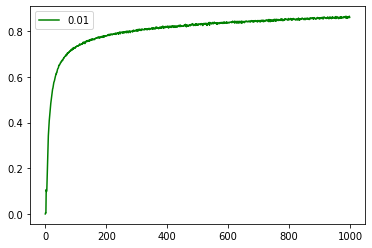

In [11]:
running_reward_sum = np.copy(reward_estimates) # _per_action_per_bandit

rewards = []
rewards.append(0) 
rewards.append(np.mean(initial_reward_estimates)) # step 1

epsilon = 0.01
for step in range(2,steps):
    reward_sum_over_all_bandits_per_step = 0
    for problem_index in range(n_bandit):  
        if np.random.random() > epsilon: # Greedy Selection
            maxval = np.amax(reward_estimates[problem_index])
            maxval_indices = np.ravel(np.array(np.where(reward_estimates[problem_index] == maxval)))
            random_choice = np.random.choice( maxval_indices ) # breaking ties randomly
        else :
             random_choice = np.random.randint(n_lever)
        
        #print(str(problem_index),str(step),str(random_choice))
        running_reward_sum[problem_index][random_choice] += np.random.normal(testbed[problem_index][random_choice],1)
        action_count[problem_index][random_choice] += 1         
        avg_reward = running_reward_sum[problem_index][random_choice] / action_count[problem_index][random_choice]
        reward_estimates[problem_index][random_choice] = avg_reward
        
        reward_sum_over_all_bandits_per_step += avg_reward
        
    rewards.append((reward_sum_over_all_bandits_per_step)/n_bandit)
    
rewards_eps_001 = rewards
plt.plot(np.arange(steps), rewards_eps_001, label=0.01, color='green')
plt.legend(loc=2, ncol=2)
plt.show()

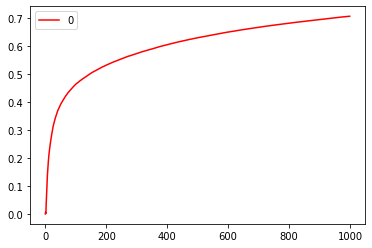

In [12]:
running_reward_sum = np.copy(reward_estimates) # _per_action_per_bandit

rewards = []
rewards.append(0) 
rewards.append(np.mean(initial_reward_estimates)) # step 1

epsilon = 0.0
for step in range(2,steps):
    reward_sum_over_all_bandits_per_step = 0
    for problem_index in range(n_bandit):  
        if np.random.random() > epsilon: # Greedy Selection
            maxval = np.amax(reward_estimates[problem_index])
            maxval_indices = np.ravel(np.array(np.where(reward_estimates[problem_index] == maxval)))
            random_choice = np.random.choice( maxval_indices ) # breaking ties randomly
        else :
             random_choice = np.random.randint(n_lever)
        
        #print(str(problem_index),str(step),str(random_choice))
        running_reward_sum[problem_index][random_choice] += np.random.normal(testbed[problem_index][random_choice],1)
        action_count[problem_index][random_choice] += 1         
        avg_reward = running_reward_sum[problem_index][random_choice] / action_count[problem_index][random_choice]
        reward_estimates[problem_index][random_choice] = avg_reward
        
        reward_sum_over_all_bandits_per_step += avg_reward
        
    rewards.append((reward_sum_over_all_bandits_per_step)/n_bandit)
    
rewards_eps_0 = rewards
plt.plot(np.arange(steps), rewards_eps_0, label=0, color='red')
plt.legend(loc=2, ncol=2)
plt.show()

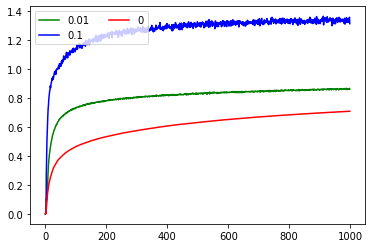

In [13]:
plt.plot(np.arange(steps), rewards_eps_001, label=0.01, color='green')
plt.plot(np.arange(steps), rewards_eps_01, label=0.1, color='blue')
plt.plot(np.arange(steps), rewards_eps_0, label=0, color='red')

plt.legend(loc=2, ncol=2)
plt.show()

In [14]:
def rewards_per_step(steps, n_bandit, n_lever, testbed, initial_reward_estimates, epsilon):
    reward_estimates = np.zeros((n_bandit,n_lever))
    action_count = np.ones((n_bandit,n_lever))  # each lever is pulled atleast once
    running_reward_sum = np.copy(reward_estimates) # _per_pull_per_bandit

    avg_rewards_per_step = []
    avg_rewards_per_step.append(0) 
    avg_rewards_per_step.append(np.mean(initial_reward_estimates)) # step 1

    for step in range(2,steps):
        reward_sum_over_all_bandits_per_step = 0
        for problem_index in range(n_bandit):  
            if np.random.random() > epsilon:
                maxval = np.amax(reward_estimates[problem_index])
                maxval_indices = np.ravel(np.array(np.where(reward_estimates[problem_index] == maxval)))
                random_choice = np.random.choice( maxval_indices )
            else :
                 random_choice = np.random.randint(n_lever)

            #print(str(problem_index),str(step),str(random_choice))
            running_reward_sum[problem_index][random_choice] += np.random.normal(testbed[problem_index][random_choice],1)
            action_count[problem_index][random_choice] += 1         
            avg_reward = running_reward_sum[problem_index][random_choice] / action_count[problem_index][random_choice]
            reward_estimates[problem_index][random_choice] = avg_reward

            reward_sum_over_all_bandits_per_step += avg_reward

        avg_rewards_per_step.append((reward_sum_over_all_bandits_per_step)/n_bandit)
    return avg_rewards_per_step

In [15]:
np.random.seed(10)
n_bandit = 2000
n_lever = 10
steps = 3000

testbed = np.random.normal(0,1,(n_bandit,n_lever))
initial_reward_estimates =  np.random.normal(testbed,1)

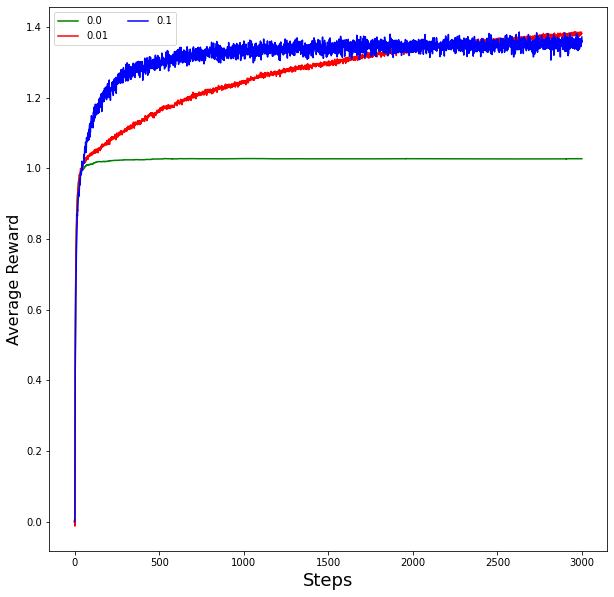

In [16]:
epsilon_list = [0.0,0.01,0.1]
color_list = ['g','r','b']

plt.figure(figsize=(10,10))
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Average Reward', fontsize=16)

for index,eps in enumerate(epsilon_list):
    avg_rewards_per_step = rewards_per_step(steps, n_bandit, n_lever, testbed, initial_reward_estimates, eps)
    plt.plot(np.arange(steps),avg_rewards_per_step,label=eps, color=color_list[index])
    
plt.legend(loc=2, ncol=2)
plt.show()